In [1]:
#LIBRARIES

In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import kruskal, mannwhitneyu
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [7]:
data = pd.read_csv('../data/Life_Expectancy_Data.csv')

In [8]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      6               8.16           65        0.1  584.259210  33736494.0   
1     58               8.18           62        0.1  612.696514    327582.0   
2     62               8.13           64        0.1  631.744976  31731688.0   
3     67               8.52           67        0.1  669.959000   3696958.0   
4     68               7.87           68        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [9]:
data.shape

(1649, 22)

In [10]:
print(data.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [11]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.810000               37.438577    74.000000       0.000000   
50%       3.790000              145.102253    89.000000      15.000000   
75%       7.340000              509.389994    96.000000     373.000000   
max      17.870000            18961.348600    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           44.220133    83.564585           5.955925   
std      19.754249          162.897999    22.450557           2.299385   
min       2.000000            0.000000     3.000000           0.740000   
25%      19.500000            1.000000    81.000000           4.410000   
50%      43.700000            4.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031887  1.465363e+07   
std      21.579193     6.032360   11475.900117  7.046039e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     462.149650  1.918970e+05   
50%      92.000000     0.100000    1592.572182  1.419631e+06   
75%      97.000000     0.700000    4718.512910  7.658972e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631551    12.119891  
std                           0.183089     2.795388  
min                           0.000000     4.200000  
25%                           0.509000    10.300000  
50%                           0.673000    12.300000  
75%                           0.751000    14.000000  
max                           0.936000    20.700000

In [12]:
data = data.dropna()

In [13]:
data.columns = data.columns.str.replace(' ', '_')

In [14]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [15]:
selected_features = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources',
                      'Hepatitis_B', 'Country' , '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 'GDP', 'Status', 'Total_expenditure']
target_variable = 'Life_expectancy_'

In [16]:
print(selected_features)

['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources', 'Hepatitis_B', 'Country', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 'GDP', 'Status', 'Total_expenditure']


In [17]:
data_selected = data[selected_features]

In [18]:
# Filter the DataFrame to include only selected features and the target variable
selected_data = data[selected_features + [target_variable]]

In [19]:
print(selected_data.columns)

Index(['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources',
       'Hepatitis_B', 'Country', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_',
       'GDP', 'Status', 'Total_expenditure', 'Life_expectancy_'],
      dtype='object')


In [20]:
selected_data.describe()

Adult_Mortality      Alcohol  Income_composition_of_resources  \
count      1649.000000  1649.000000                      1649.000000   
mean        168.215282     4.533196                         0.631551   
std         125.310417     4.029189                         0.183089   
min           1.000000     0.010000                         0.000000   
25%          77.000000     0.810000                         0.509000   
50%         148.000000     3.790000                         0.673000   
75%         227.000000     7.340000                         0.751000   
max         723.000000    17.870000                         0.936000   

       Hepatitis_B    _HIV/AIDS         Year    Schooling        _BMI_  \
count  1649.000000  1649.000000  1649.000000  1649.000000  1649.000000   
mean     79.217708     1.983869  2007.840509    12.119891    38.128623   
std      25.604664     6.032360     4.087711     2.795388    19.754249   
min       2.000000     0.100000  2000.000000     4.200000     2.000000   
25%      74.000000     0.100000  2005.000000    10.300000    19.500000   
50%      89.000000     0.100000  2008.000000    12.300000    43.700000   
75%      96.000000     0.700000  2011.000000    14.000000    55.800000   
max      99.000000    50.600000  2015.000000    20.700000    77.100000   

                 GDP  Total_expenditure  Life_expectancy_  
count    1649.000000        1649.000000       1649.000000  
mean     5566.031887           5.955925         69.302304  
std     11475.900117           2.299385          8.796834  
min         1.681350           0.740000         44.000000  
25%       462.149650           4.410000         64.400000  
50%      1592.572182           5.840000         71.700000  
75%      4718.512910           7.470000         75.000000  
max    119172.741800          14.390000         89.000000

#OUTLIERS

In [21]:
# Select only numeric columns for outlier detection
numeric_columns = selected_data.select_dtypes(include=['int64', 'float64'])

# Calculate the IQR for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers for each numeric column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).sum()

# Display the number of outliers in each numeric column
print("Number of outliers in each numeric column:")
print(outliers_count)

Number of outliers in each numeric column:
Adult_Mortality                     54
Alcohol                              2
Income_composition_of_resources     48
Hepatitis_B                        165
_HIV/AIDS                          299
Year                                 0
Schooling                           16
_BMI_                                0
GDP                                208
Total_expenditure                    7
Life_expectancy_                    39
dtype: int64


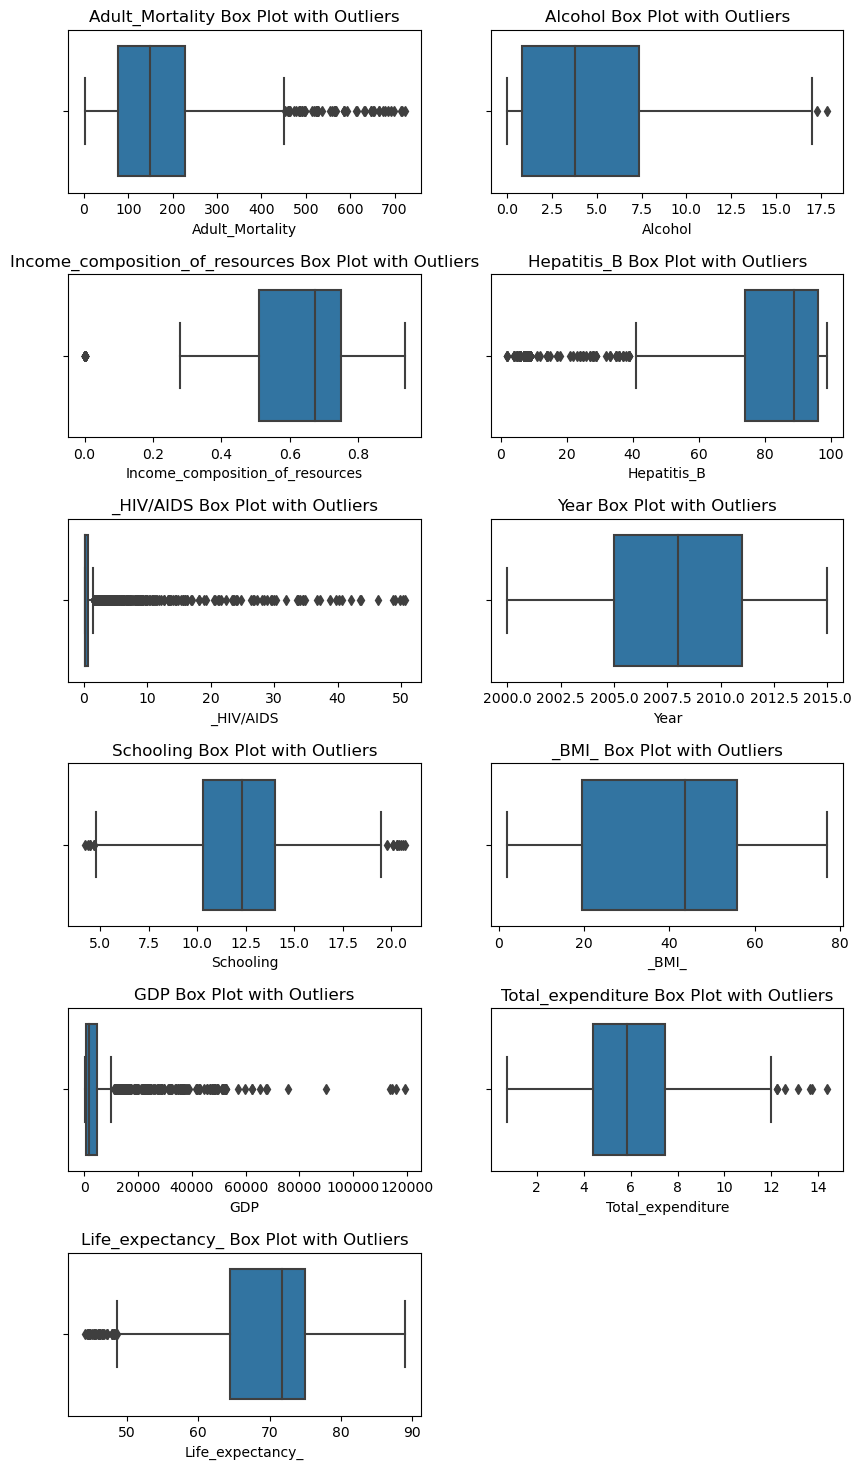

In [22]:
# Identify numerical columns
numerical_columns = selected_data.select_dtypes(include='number')

# Calculate the number of rows and columns for subplots
num_rows = len(numerical_columns) // 2 + len(numerical_columns) % 2
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns.columns) // 2 + len(numerical_columns.columns) % 2, ncols=2, figsize=(10, 3 * (len(numerical_columns.columns) // 2 + len(numerical_columns.columns) % 2)))
fig.subplots_adjust(hspace=0.5)

# Iterate through each numerical column
for i, column in enumerate(numerical_columns.columns):
    # Box plot for numerical variables with outliers
    sns.boxplot(x=column, data=numerical_columns, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{column} Box Plot with Outliers')

# Remove empty subplots if the number of numerical columns is odd
if len(numerical_columns.columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

In [23]:
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for capping outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap outliers for each column
for column in numerical_columns.columns:
    selected_data.loc[selected_data[column] < lower_bound[column], column] = lower_bound[column] 
    selected_data.loc[selected_data[column] > upper_bound[column], column] = upper_bound[column]

In [24]:
# Select only numeric columns for outlier detection
numeric_columns = selected_data.select_dtypes(include=['int64', 'float64'])

# Calculate the IQR for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers for each numeric column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).sum()

# Display the number of outliers in each numeric column
print("Number of outliers in each numeric column:")
print(outliers_count)

Number of outliers in each numeric column:
Adult_Mortality                    0
Alcohol                            0
Income_composition_of_resources    0
Hepatitis_B                        0
_HIV/AIDS                          0
Year                               0
Schooling                          0
_BMI_                              0
GDP                                0
Total_expenditure                  0
Life_expectancy_                   0
dtype: int64


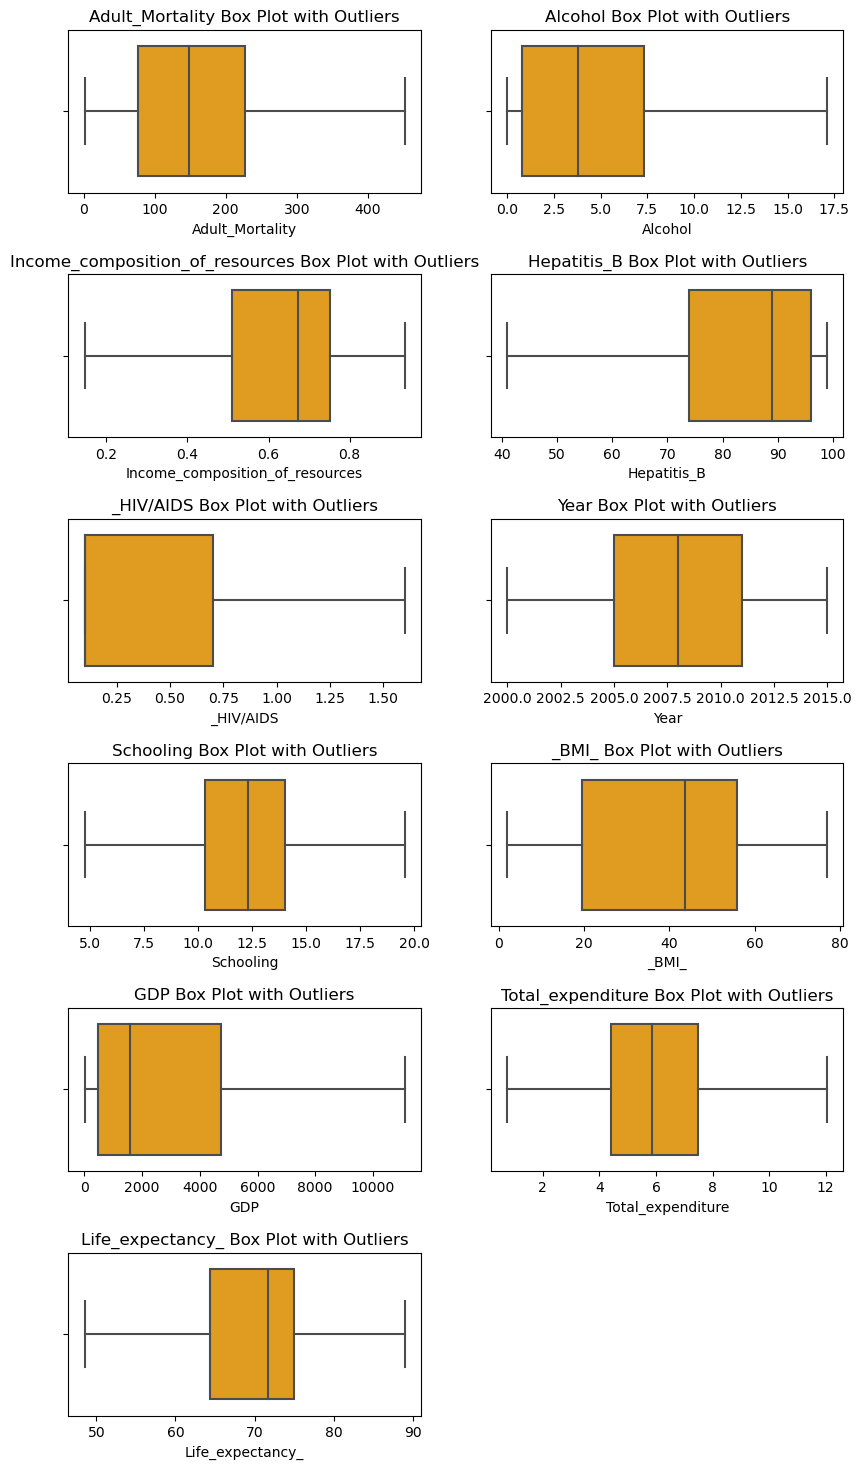

In [25]:
# Identify numerical columns
numerical_columns = selected_data.select_dtypes(include='number')

# Calculate the number of rows and columns for subplots
num_rows = len(numerical_columns) // 2 + len(numerical_columns) % 2
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns.columns) // 2 + len(numerical_columns.columns) % 2, ncols=2, figsize=(10, 3 * (len(numerical_columns.columns) // 2 + len(numerical_columns.columns) % 2)))
fig.subplots_adjust(hspace=0.5)

boxplot_color = 'orange'

# Iterate through each numerical column
for i, column in enumerate(numerical_columns.columns):
    # Box plot for numerical variables with outliers
    sns.boxplot(x=column, data=numerical_columns, ax=axes[i // 2, i % 2], color=boxplot_color)
    axes[i // 2, i % 2].set_title(f'{column} Box Plot with Outliers')

# Remove empty subplots if the number of numerical columns is odd
if len(numerical_columns.columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()


In [26]:
selected_data.describe()

Adult_Mortality      Alcohol  Income_composition_of_resources  \
count      1649.000000  1649.000000                      1649.000000   
mean        164.469375     4.532644                         0.635801   
std         113.645940     4.027419                         0.169567   
min           1.000000     0.010000                         0.146000   
25%          77.000000     0.810000                         0.509000   
50%         148.000000     3.790000                         0.673000   
75%         227.000000     7.340000                         0.751000   
max         452.000000    17.135000                         0.936000   

       Hepatitis_B    _HIV/AIDS         Year    Schooling        _BMI_  \
count  1649.000000  1649.000000  1649.000000  1649.000000  1649.000000   
mean     82.018799     0.483445  2007.840509    12.116192    38.128623   
std      18.574411     0.588738     4.087711     2.779930    19.754249   
min      41.000000     0.100000  2000.000000     4.750000     2.000000   
25%      74.000000     0.100000  2005.000000    10.300000    19.500000   
50%      89.000000     0.100000  2008.000000    12.300000    43.700000   
75%      96.000000     0.700000  2011.000000    14.000000    55.800000   
max      99.000000     1.600000  2015.000000    19.550000    77.100000   

                GDP  Total_expenditure  Life_expectancy_  
count   1649.000000        1649.000000       1649.000000  
mean    3301.756961           5.951340         69.355185  
std     3670.000460           2.285542          8.661437  
min        1.681350           0.740000         48.500000  
25%      462.149650           4.410000         64.400000  
50%     1592.572182           5.840000         71.700000  
75%     4718.512910           7.470000         75.000000  
max    11103.057800          12.060000         89.000000

In [27]:
summary_stats = selected_data.describe()
print(summary_stats)

       Adult_Mortality      Alcohol  Income_composition_of_resources  \
count      1649.000000  1649.000000                      1649.000000   
mean        164.469375     4.532644                         0.635801   
std         113.645940     4.027419                         0.169567   
min           1.000000     0.010000                         0.146000   
25%          77.000000     0.810000                         0.509000   
50%         148.000000     3.790000                         0.673000   
75%         227.000000     7.340000                         0.751000   
max         452.000000    17.135000                         0.936000   

       Hepatitis_B    _HIV/AIDS         Year    Schooling        _BMI_  \
count  1649.000000  1649.000000  1649.000000  1649.000000  1649.000000   
mean     82.018799     0.483445  2007.840509    12.116192    38.128623   
std      18.574411     0.588738     4.087711     2.779930    19.754249   
min      41.000000     0.100000  2000.000000     4.7500

In [28]:
# Display mean, median, and standard deviation

numeric_columns = selected_data.select_dtypes(include=['number'])
summary_stats = numeric_columns.describe()

print("Mean:")
print(summary_stats.loc['mean'])

print("\nMedian:")
print(numeric_columns.median())

print("\nStandard Deviation:")
print(summary_stats.loc['std'])

Mean:
Adult_Mortality                     164.469375
Alcohol                               4.532644
Income_composition_of_resources       0.635801
Hepatitis_B                          82.018799
_HIV/AIDS                             0.483445
Year                               2007.840509
Schooling                            12.116192
_BMI_                                38.128623
GDP                                3301.756961
Total_expenditure                     5.951340
Life_expectancy_                     69.355185
Name: mean, dtype: float64

Median:
Adult_Mortality                     148.000000
Alcohol                               3.790000
Income_composition_of_resources       0.673000
Hepatitis_B                          89.000000
_HIV/AIDS                             0.100000
Year                               2008.000000
Schooling                            12.300000
_BMI_                                43.700000
GDP                                1592.572182
Total_expenditure 

In [29]:
numerical_columns = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources',
                      'Hepatitis_B',  '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 'GDP', 'Total_expenditure' , 'Life_expectancy_']

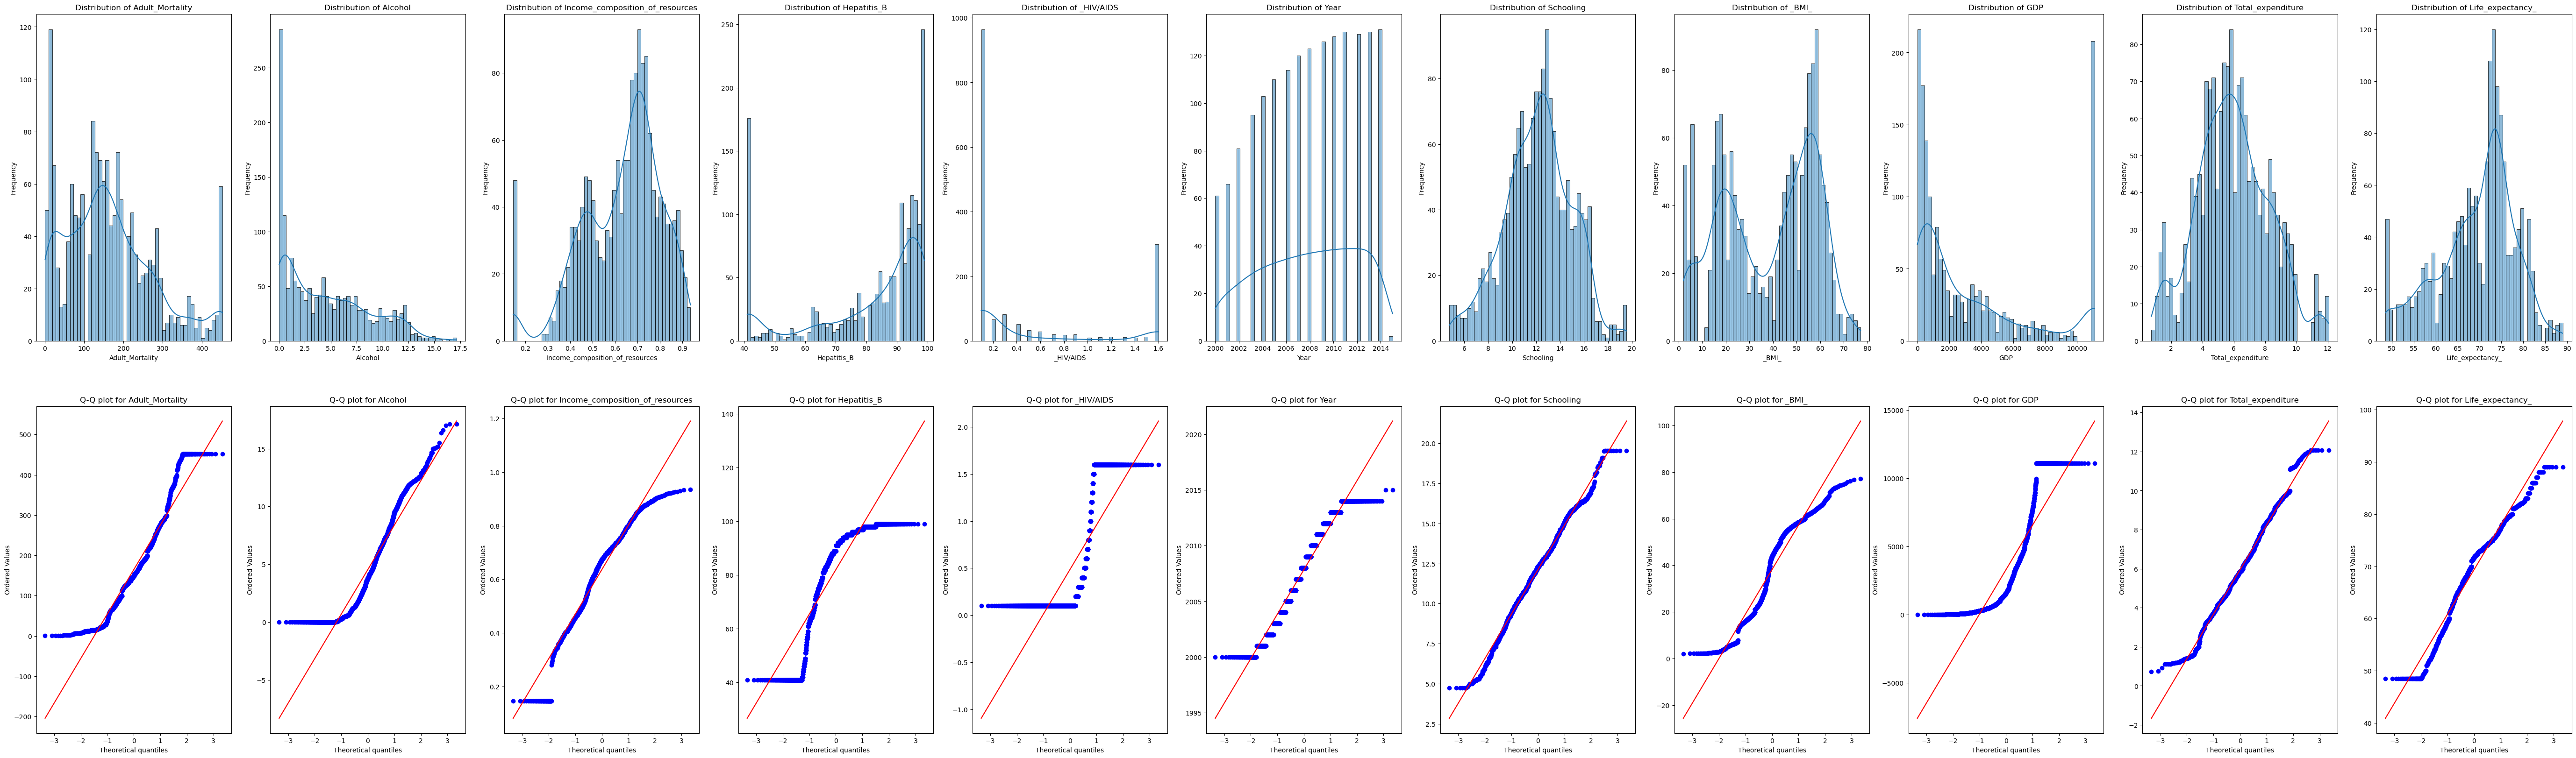

In [30]:
from scipy.stats import probplot

numerical_features = selected_data[numerical_columns]

# Set up subplots for histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_features.columns), figsize=(70, 20))

# Plot histograms
for i, column in enumerate(numerical_features.columns):
    sns.histplot(data=numerical_features, x=column, bins=50, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {column}')
    axes[0, i].set_ylabel('Frequency')

# Q-Q plots
for i, column in enumerate(numerical_features.columns):
    probplot(numerical_features[column], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'Q-Q plot for {column}')


plt.show()

In [31]:
from scipy.stats import shapiro

numerical_features = selected_data[numerical_columns]

# Shapiro-Wilk test for each numerical feature
for column in numerical_columns:
    stat, p_value = shapiro(numerical_features[column])

    # Set a significance level (e.g., 0.05)
    alpha = 0.05

    # Print the results
    print(f'{column}:')
    print(f'Statistic: {stat}, p-value: {p_value}')

    # Check the null hypothesis
    if p_value > alpha:
        print('Result: Data looks normally distributed (fail to reject H0)\n')
    else:
        print('Result: Data does not look normally distributed (reject H0)\n')

Adult_Mortality:
Statistic: 0.9416123032569885, p-value: 5.395622223322862e-25
Result: Data does not look normally distributed (reject H0)

Alcohol:
Statistic: 0.9099046587944031, p-value: 3.5255539417319726e-30
Result: Data does not look normally distributed (reject H0)

Income_composition_of_resources:
Statistic: 0.9559358358383179, p-value: 6.606685090112496e-22
Result: Data does not look normally distributed (reject H0)

Hepatitis_B:
Statistic: 0.7929079532623291, p-value: 1.4109674237286583e-41
Result: Data does not look normally distributed (reject H0)

_HIV/AIDS:
Statistic: 0.6428849697113037, p-value: 0.0
Result: Data does not look normally distributed (reject H0)

Year:
Statistic: 0.9531741142272949, p-value: 1.4840763217098546e-22
Result: Data does not look normally distributed (reject H0)

Schooling:
Statistic: 0.9937988519668579, p-value: 2.1570883745880565e-06
Result: Data does not look normally distributed (reject H0)

_BMI_:
Statistic: 0.9313482046127319, p-value: 7.1912

In all cases, the null hypothesis (H0) is rejected, suggesting that the data is not normally distributed based on the Shapiro-Wilk test

In [32]:
# Select 'Developed' and 'Developing' groups
group_developed = selected_data[selected_data['Status'] == 'Developed']
group_developing = selected_data[selected_data['Status'] == 'Developing']

# Perform Mann-Whitney U and Kruskal-Wallis tests for all numerical features
alpha = 0.05

for feature in selected_data.select_dtypes(include='number').columns:
    # Perform Mann-Whitney U test
    mw_statistic, mw_p_value = mannwhitneyu(group_developed[feature], group_developing[feature])

    # Null Hypothesis (H0): The distribution of the variable is the same in both groups.
    # Alternative Hypothesis (H1): The distribution of the variable is different between the groups.

    print(f'{feature}:\n'
          f'Mann-Whitney U Test - Statistic: {mw_statistic}, P-value: {mw_p_value}\n'
          f'Null Hypothesis: The distribution of {feature} is the same in both groups.\n'
          f'Alternative Hypothesis: The distribution of {feature} is different between the groups.\n')

    if mw_p_value < alpha:
        print(f'Mann-Whitney U test: There is a significant difference in {feature} between the two groups.\n')
    else:
        print(f'Mann-Whitney U test: There is insufficient evidence to suggest a significant difference in {feature} between groups.\n')

    # Perform Kruskal-Wallis test
    kw_statistic, kw_p_value = kruskal(group_developed[feature], group_developing[feature])

    # Null Hypothesis (H0): The distribution of the variable is the same in both groups.
    # Alternative Hypothesis (H1): The distribution of the variable is different between the groups.

    print(f'Kruskal-Wallis Test - Statistic: {kw_statistic}, P-value: {kw_p_value}\n'
          f'Null Hypothesis: The distribution of {feature} is the same in both groups.\n'
          f'Alternative Hypothesis: The distribution of {feature} is different between the groups.\n')

    if kw_p_value < alpha:
        print(f'Kruskal-Wallis test: There are significant differences in {feature} between the two groups.\n')
    else:
        print(f'Kruskal-Wallis test: There is insufficient evidence to suggest significant differences in {feature} between groups.\n')

Adult_Mortality:
Mann-Whitney U Test - Statistic: 81481.0, P-value: 1.7334554934005212e-38
Null Hypothesis: The distribution of Adult_Mortality is the same in both groups.
Alternative Hypothesis: The distribution of Adult_Mortality is different between the groups.

Mann-Whitney U test: There is a significant difference in Adult_Mortality between the two groups.

Kruskal-Wallis Test - Statistic: 168.30904476272303, P-value: 1.7318032336330076e-38
Null Hypothesis: The distribution of Adult_Mortality is the same in both groups.
Alternative Hypothesis: The distribution of Adult_Mortality is different between the groups.

Kruskal-Wallis test: There are significant differences in Adult_Mortality between the two groups.

Alcohol:
Mann-Whitney U Test - Statistic: 319261.5, P-value: 2.698977900246903e-105
Null Hypothesis: The distribution of Alcohol is the same in both groups.
Alternative Hypothesis: The distribution of Alcohol is different between the groups.

Mann-Whitney U test: There is a s

In [33]:
# Perform T-Test for all numerical features between two status categories
status_1 = selected_data[selected_data['Status'] == 'Developed']
status_2 = selected_data[selected_data['Status'] == 'Developing']

for feature in summary_stats.columns:
    if selected_data[feature].dtype != 'object':  # Check if the feature is numerical
        t_stat, p_value = ttest_ind(status_1[feature], status_2[feature])

        # Print the T-Test results
        print(f'T-Test for {feature} between Developed and Developing Status:\n'
              f'T-statistic: {t_stat}\nP-value: {p_value}')

        # Interpret the results based on the p-value
        alpha = 0.05  # Significance level (you can adjust this based on your study)
        if p_value < alpha:
            print(f'The difference in {feature} between Developed and Developing Status is statistically significant.\n')
        else:
            print(f'There is insufficient evidence to suggest a significant difference in {feature} between Developed and Developing Status.\n')


T-Test for Adult_Mortality between Developed and Developing Status:
T-statistic: -12.439037710619573
P-value: 5.135659846119313e-34
The difference in Adult_Mortality between Developed and Developing Status is statistically significant.

T-Test for Alcohol between Developed and Developing Status:
T-statistic: 31.087387944095646
P-value: 2.4194471521622734e-167
The difference in Alcohol between Developed and Developing Status is statistically significant.

T-Test for Income_composition_of_resources between Developed and Developing Status:
T-statistic: 22.823530530953867
P-value: 2.084310475079736e-100
The difference in Income_composition_of_resources between Developed and Developing Status is statistically significant.

T-Test for Hepatitis_B between Developed and Developing Status:
T-statistic: 6.725442689901183
P-value: 2.406925536351565e-11
The difference in Hepatitis_B between Developed and Developing Status is statistically significant.

T-Test for _HIV/AIDS between Developed and De

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Hypothesis

In [34]:
from scipy.stats import spearmanr

# Select numerical columns
numerical = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources',  
            'Hepatitis_B', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 'GDP',
            'Total_expenditure', 'Life_expectancy_']

# Perform Spearman correlation between each numerical variable and life expectancy  
for feature in numerical:
    if feature != 'Life_expectancy_':
        correlation, p_value = spearmanr(selected_data[feature], selected_data['Life_expectancy_'])

        print(f'Correlation between {feature} and Life expectancy:\n' 
              f'Spearman Rho: {correlation}\nP-value: {p_value}')
            
        alpha = 0.05
        if p_value < alpha:
            print(f'Significant correlation between {feature} and Life expectancy\n')
        else:
            print(f'No significant correlation between {feature} and Life expectancy\n')

Correlation between Adult_Mortality and Life expectancy:
Spearman Rho: -0.6557506201733765
P-value: 2.715280794363743e-203
Significant correlation between Adult_Mortality and Life expectancy

Correlation between Alcohol and Life expectancy:
Spearman Rho: 0.45151105086570287
P-value: 1.2636960525445403e-83
Significant correlation between Alcohol and Life expectancy

Correlation between Income_composition_of_resources and Life expectancy:
Spearman Rho: 0.8489750315825578
P-value: 0.0
Significant correlation between Income_composition_of_resources and Life expectancy

Correlation between Hepatitis_B and Life expectancy:
Spearman Rho: 0.29762095030447344
P-value: 4.427096390157976e-35
Significant correlation between Hepatitis_B and Life expectancy

Correlation between _HIV/AIDS and Life expectancy:
Spearman Rho: -0.7148270765471292
P-value: 3.9920253835903157e-258
Significant correlation between _HIV/AIDS and Life expectancy

Correlation between Year and Life expectancy:
Spearman Rho: 0.05

In [35]:
from scipy.stats import kendalltau

# Select numerical columns
numerical = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources', 
             'Hepatitis_B', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 'GDP', 
             'Total_expenditure', 'Life_expectancy_']

# Perform Kendall correlation between each numerical variable and life expectancy
for feature in numerical:
    if feature != 'Life_expectancy_':
        correlation, p_value = kendalltau(selected_data[feature], selected_data['Life_expectancy_'])
        
        print(f'Correlation between {feature} and Life expectancy:\n'
              f'Kendall Tau: {correlation}\nP-value: {p_value}')
        
        alpha = 0.05
        if p_value < alpha:
            print(f'Significant correlation between {feature} and Life expectancy \n')
        else:
            print(f'No significant correlation between {feature} and Life expectancy\n')

Correlation between Adult_Mortality and Life expectancy:
Kendall Tau: -0.554014515195799
P-value: 1.055095379553892e-246
Significant correlation between Adult_Mortality and Life expectancy 

Correlation between Alcohol and Life expectancy:
Kendall Tau: 0.3110626506250147
P-value: 1.339686174493585e-78
Significant correlation between Alcohol and Life expectancy 

Correlation between Income_composition_of_resources and Life expectancy:
Kendall Tau: 0.6655397014824229
P-value: 0.0
Significant correlation between Income_composition_of_resources and Life expectancy 

Correlation between Hepatitis_B and Life expectancy:
Kendall Tau: 0.19951058393504498
P-value: 2.2619688866766142e-32
Significant correlation between Hepatitis_B and Life expectancy 

Correlation between _HIV/AIDS and Life expectancy:
Kendall Tau: -0.5806351510871092
P-value: 1.0180601983118943e-212
Significant correlation between _HIV/AIDS and Life expectancy 

Correlation between Year and Life expectancy:
Kendall Tau: 0.04225

In [36]:
from scipy.stats import pearsonr
# Perform correlation analysis for each variable
alpha = 0.05

for feature in numerical_columns:
    # Perform correlation analysis
    correlation_coefficient, p_value = pearsonr(selected_data[feature], selected_data[target_variable])

    # Print the results
    print(f'{feature}:\n'
          f'Correlation Coefficient: {correlation_coefficient}\nP-value: {p_value}\n'
          f'Null Hypothesis: There is no significant linear relationship between {feature} and {target_variable}.\n'
          f'Alternative Hypothesis: There is a significant linear relationship between {feature} and {target_variable}.\n')

    # Interpret the results
    if p_value < alpha:
        print(f'There is a significant linear relationship between {feature} and {target_variable}.\n')
    else:
        print(f'There is insufficient evidence to suggest a significant linear relationship between {feature} and {target_variable}.\n')

Adult_Mortality:
Correlation Coefficient: -0.6945997774931941
P-value: 7.554637130229311e-238
Null Hypothesis: There is no significant linear relationship between Adult_Mortality and Life_expectancy_.
Alternative Hypothesis: There is a significant linear relationship between Adult_Mortality and Life_expectancy_.

There is a significant linear relationship between Adult_Mortality and Life_expectancy_.

Alcohol:
Correlation Coefficient: 0.4074747780670972
P-value: 5.5853343561974605e-67
Null Hypothesis: There is no significant linear relationship between Alcohol and Life_expectancy_.
Alternative Hypothesis: There is a significant linear relationship between Alcohol and Life_expectancy_.

There is a significant linear relationship between Alcohol and Life_expectancy_.

Income_composition_of_resources:
Correlation Coefficient: 0.7748170053677425
P-value: 0.0
Null Hypothesis: There is no significant linear relationship between Income_composition_of_resources and Life_expectancy_.
Alternativ

Linear regression summary

In [37]:
import statsmodels.api as sm
constant_vars = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources', 'Hepatitis_B', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 'GDP', 'Total_expenditure']
target_variable = 'Life_expectancy_'

# Add a constant term for the intercept
selected_data_with_constant = sm.add_constant(selected_data[constant_vars])

# Fit the multiple linear regression model
model = sm.OLS(selected_data[target_variable], selected_data_with_constant).fit()
# Null Hypothesis (H0): There is no significant linear relationship between any of the independent variables and life expectancy.
# Alternative Hypothesis (H1): At least one of the independent variables has a significant linear relationship with life expectancy.

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life_expectancy_   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     758.2
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:56:54   Log-Likelihood:                -4474.6
No. Observations:                1649   AIC:                             8971.
Df Residuals:                    1638   BIC:                             9031.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Data Visualization

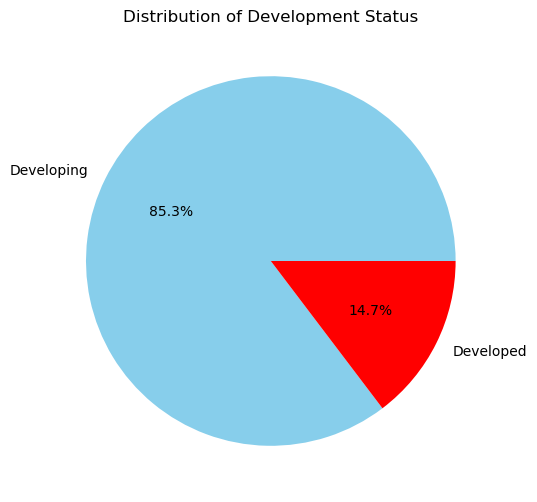

In [38]:
plt.figure(figsize=(6, 6))
selected_data['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'red'])
plt.title('Distribution of Development Status')
plt.ylabel('')
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



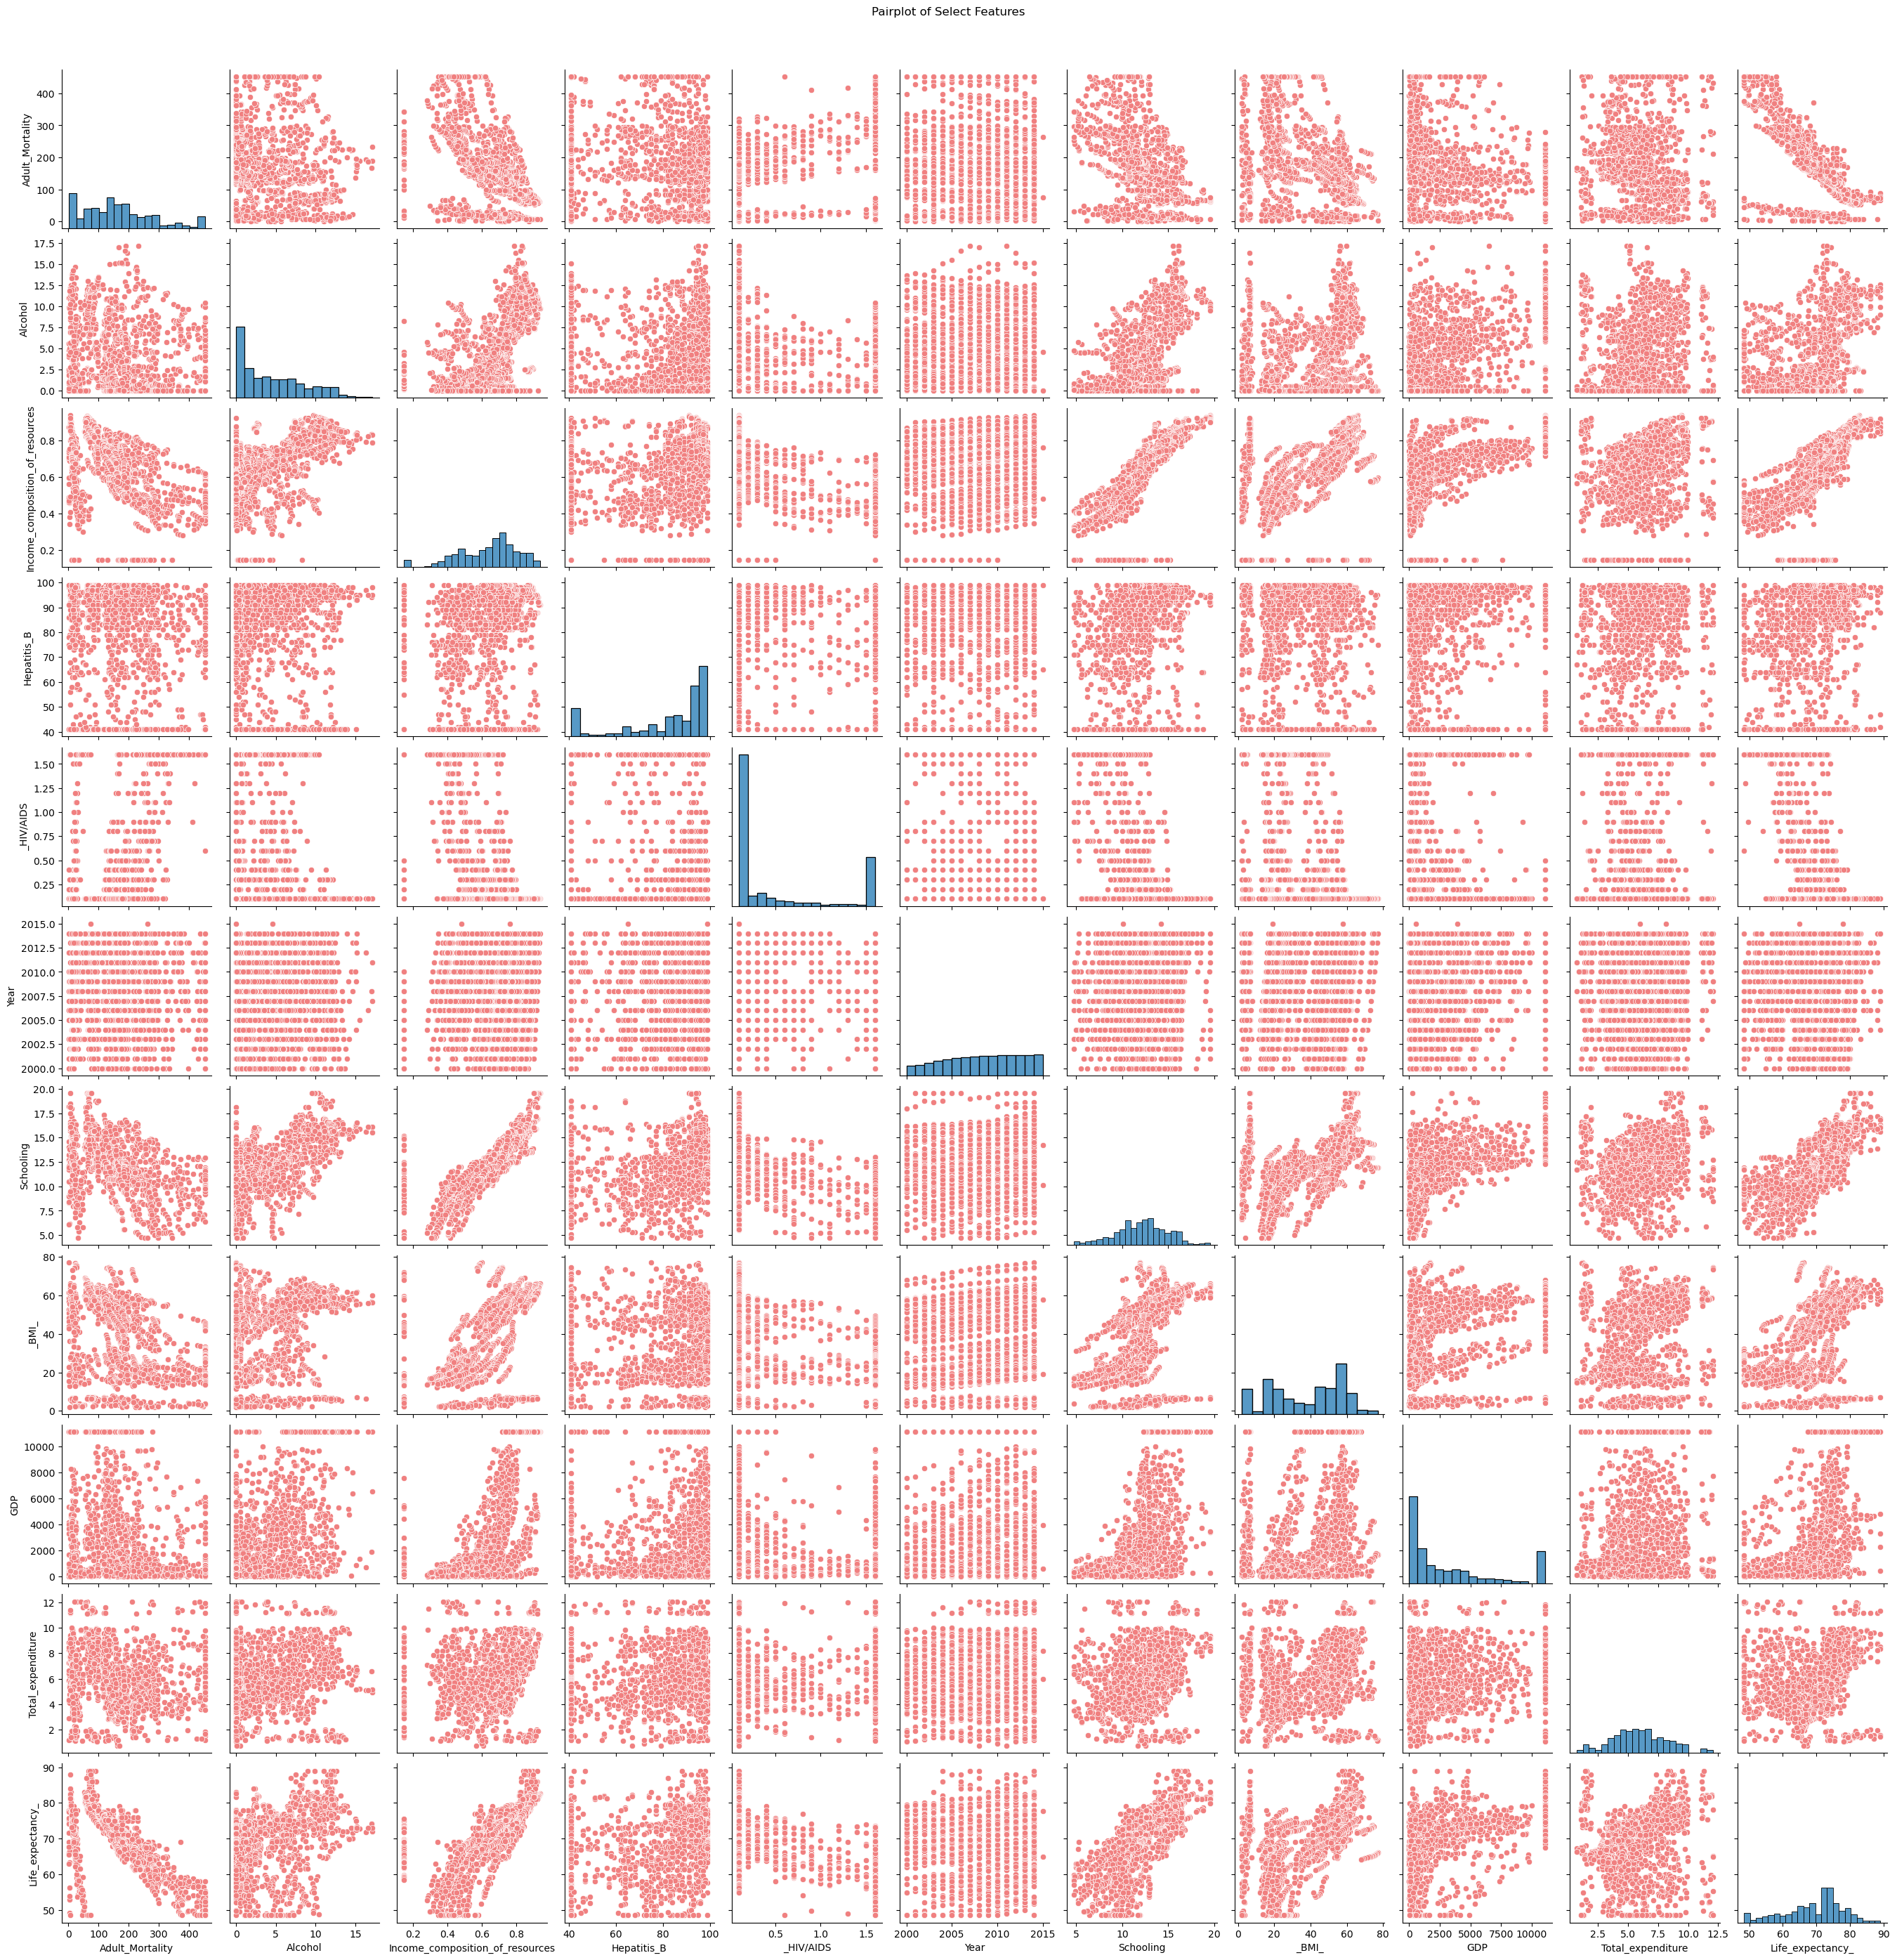

In [42]:
# Pairplot of Select Features with a different color
pairplot = selected_data[['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources',
       'Hepatitis_B', 'Country', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_',
       'GDP', 'Status', 'Total_expenditure', 'Life_expectancy_']]

plot_kws = {'color': 'lightcoral'}

sns.pairplot(pairplot, plot_kws=plot_kws)
plt.suptitle('Pairplot of Select Features', y=1.02)
plt.show()

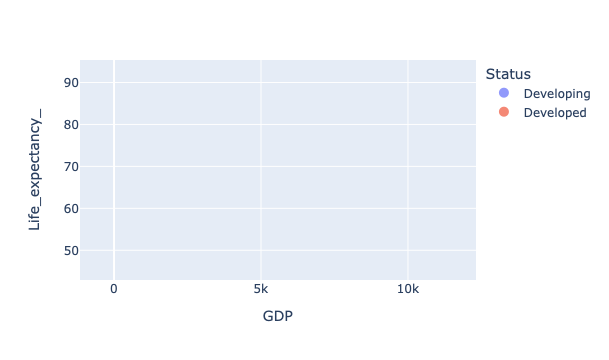

In [43]:
import plotly.express as px

# Assuming df is your DataFrame with the relevant columns
fig = px.scatter(selected_data, x='GDP', y='Life_expectancy_', color='Status', size='Income_composition_of_resources')
fig.show()

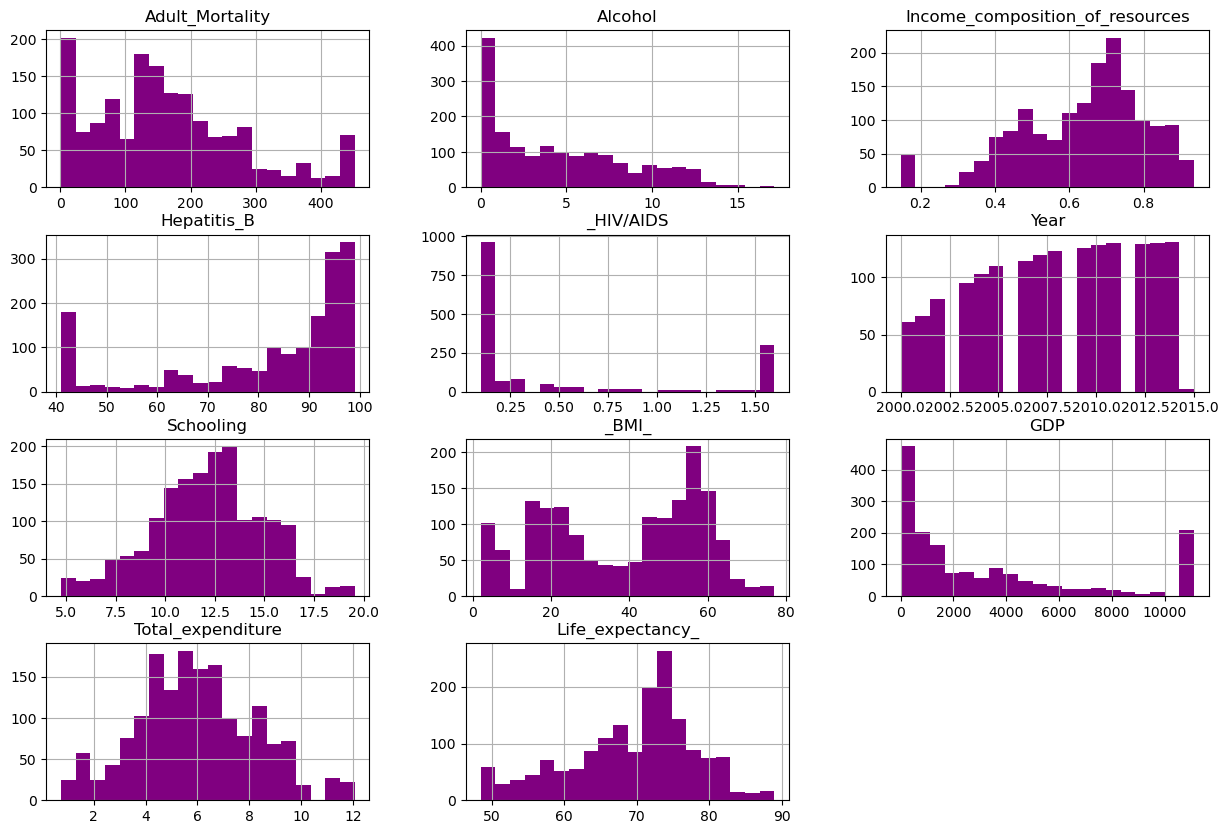

In [44]:
import matplotlib.pyplot as plt

selected_data.hist(bins=20, figsize=(15, 10), color='purple')

plt.show()

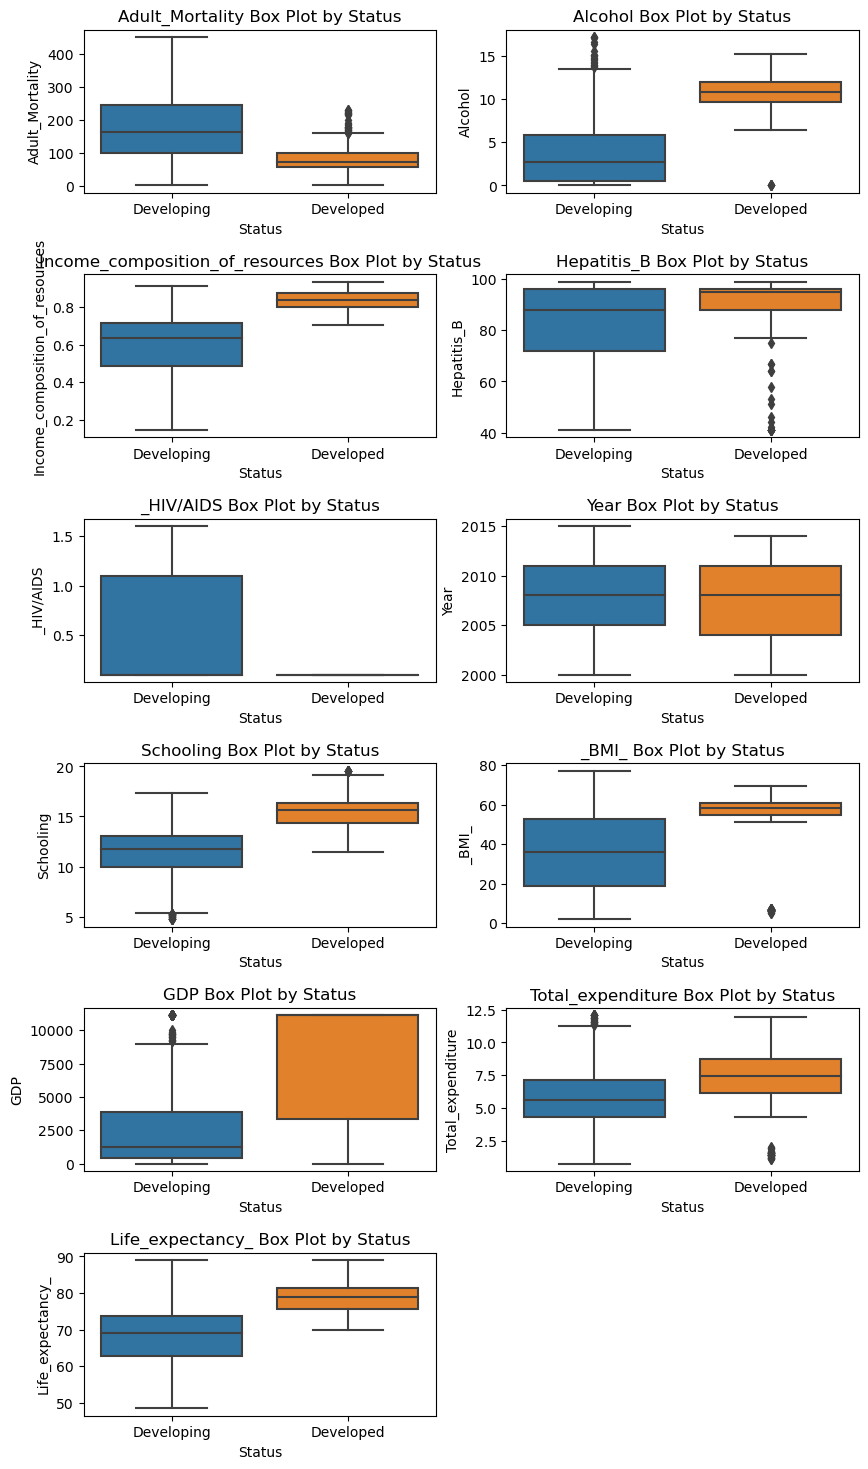

In [45]:
# Identify numerical columns
numerical_columns = selected_data.select_dtypes(include='number')

# Set up subplots
num_plots = len(numerical_columns.columns)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate through each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x='Status', y=column, data=selected_data, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'{column} Box Plot by Status')

# Remove empty subplots if the number of numerical columns is not a multiple of num_cols
if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        fig.delaxes(axes[-1, j])

plt.show()

Text(0.5, 1.0, 'Correlation Analysis with Life Expectancy')

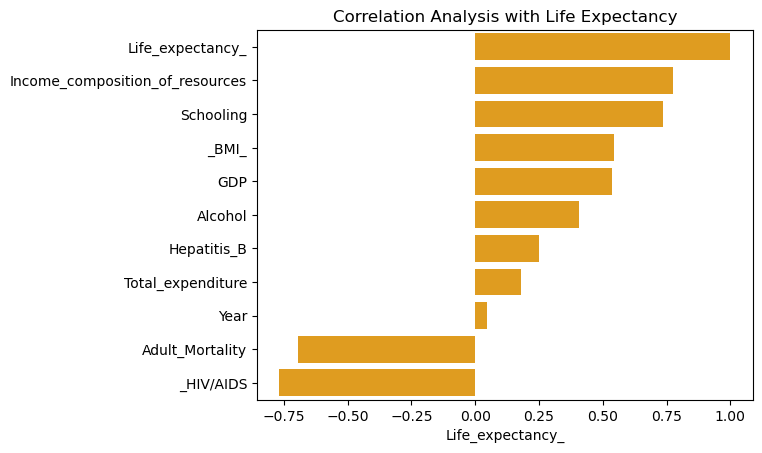

In [46]:
numeric_cols = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources', 
                'Hepatitis_B', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 
                'GDP', 'Total_expenditure', 'Life_expectancy_']

life_expectancy_corr = selected_data[numeric_cols].corr()['Life_expectancy_'].sort_values(ascending=False)

sns.barplot(x=life_expectancy_corr, y=life_expectancy_corr.index, color='orange')
plt.title('Correlation Analysis with Life Expectancy')

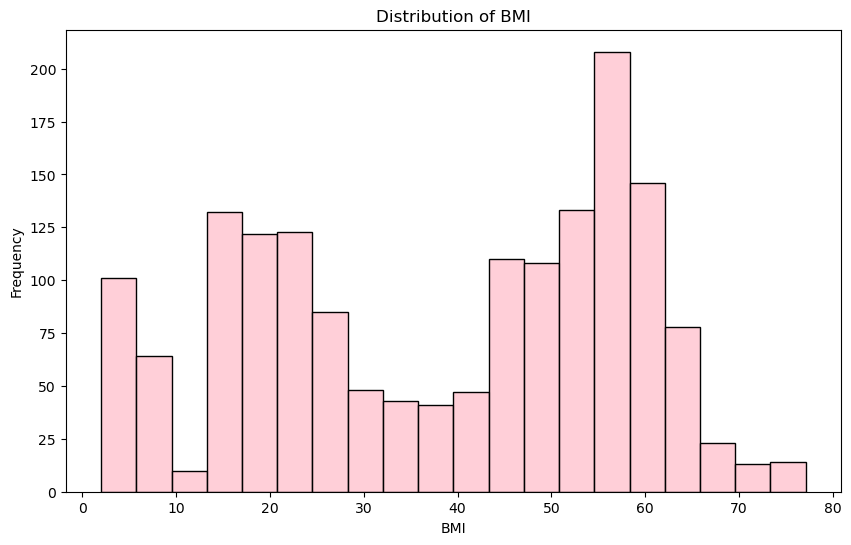

In [47]:
#Distribution of BMI:
plt.figure(figsize=(10, 6))
sns.histplot(selected_data['_BMI_'], bins=20, color='pink')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

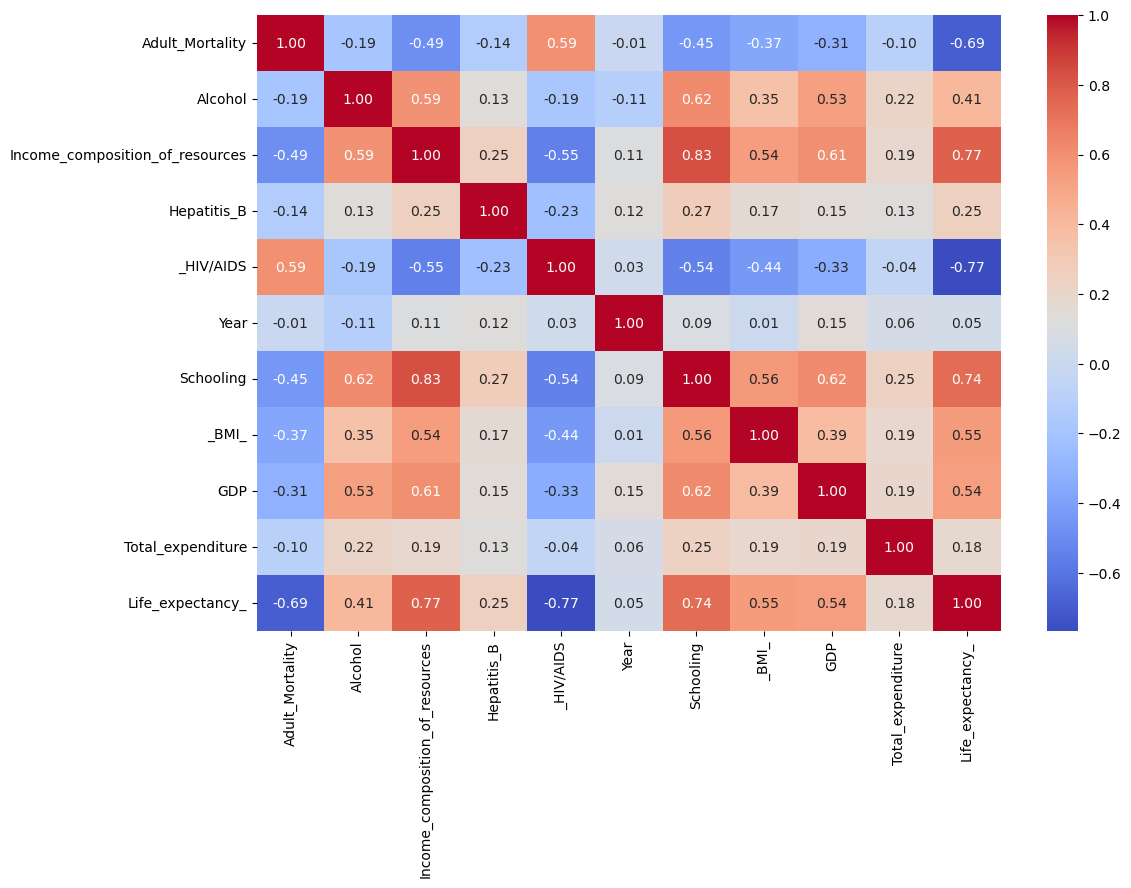

In [48]:
numeric_cols = ['Adult_Mortality', 'Alcohol', 'Income_composition_of_resources', 
                'Hepatitis_B', '_HIV/AIDS', 'Year', 'Schooling', '_BMI_', 
                'GDP', 'Total_expenditure', 'Life_expectancy_']
correlation_matrix = selected_data[numeric_cols].corr() 
# Create heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Now we should normalize the numeric columns, and one-hot-encode the categorical ones.

In [49]:
# List of features to drop
features_to_drop = [ "Adult_Mortality", "_HIV/AIDS"]

# Make a copy of the DataFrame to avoid the SettingWithCopyWarning
selected_data_copy = selected_data.copy()

# Drop the features from the copied DataFrame
selected_data_copy.drop(features_to_drop, axis=1, inplace=True)
selected_data = selected_data_copy

In [50]:
import pandas as pd

# Define categorical columns
categorical_cols = ['Status', 'Country']

# Use get_dummies to one-hot encode categorical columns
one_hot_cols = pd.get_dummies(selected_data[categorical_cols])

# Select only numeric columns for normalization
numeric_columns = selected_data.select_dtypes(include=['int64', 'float64'])

# Normalize numeric columns (you can use your own normalization method)
normalized_numeric_cols = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

# Select unchanged columns
unchanged_cols = [c for c in selected_data.columns if c not in numeric_columns.columns and c not in categorical_cols]

# Keep the other columns as they are
other_cols = selected_data[unchanged_cols]

# Concatenate all the processed columns
ready_data = pd.concat([normalized_numeric_cols, one_hot_cols, other_cols], axis=1)
ready_data

Alcohol  Income_composition_of_resources  Hepatitis_B      Year  \
0    -1.122963                        -0.924714    -0.916250  1.751467   
1    -1.122963                        -0.942406    -1.077762  1.506831   
2    -1.122963                        -0.977790    -0.970087  1.262196   
3    -1.122963                        -1.019072    -0.808575  1.017560   
4    -1.122963                        -1.072148    -0.754737  0.772924   
...        ...                              ...          ...       ...   
1644 -0.042867                        -1.349325    -0.754737 -0.939526   
1645 -0.117357                        -1.284453    -2.208350 -1.184161   
1646 -0.025486                        -1.231377    -0.485550 -1.428797   
1647 -0.698374                        -1.231377    -0.324037 -1.673433   
1648 -0.708306                        -1.190096    -0.162525 -1.918069   

      Schooling     _BMI_       GDP  Total_expenditure  Life_expectancy_  \
0     -0.725267 -0.963267 -0.740463           0.966362         -0.502825   
1     -0.761239 -0.988578 -0.732714           0.975112         -1.091642   
2     -0.797211 -1.013889 -0.727524           0.953236         -1.091642   
3     -0.833184 -1.039200 -0.717111           1.123874         -1.137823   
4     -0.941100 -1.059449 -0.882349           0.839477         -1.172460   
...         ...       ...       ...                ...               ...   
1644  -1.049016 -0.558291 -0.775856           0.515703         -2.407821   
1645  -0.941100 -0.578540 -0.776132           0.248807         -2.407821   
1646  -0.761239 -0.598789 -0.884035           0.253183         -2.407821   
1647  -0.833184 -0.619038 -0.750182           0.091296         -2.407821   
1648  -0.833184 -0.639286 -0.750517           0.502577         -2.407821   

      Status_Developed  ...  Country_Tunisia  Country_Turkey  \
0                False  ...            False           False   
1                False  ...            False           False   
2                False  ...            False           False   
3                False  ...            False           False   
4                False  ...            False           False   
...                ...  ...              ...             ...   
1644             False  ...            False           False   
1645             False  ...            False           False   
1646             False  ...            False           False   
1647             False  ...            False           False   
1648             False  ...            False           False   

      Country_Turkmenistan  Country_Uganda  Country_Ukraine  Country_Uruguay  \
0                    False           False            False            False   
1                    False           False            False            False   
2                    False           False            False            False   
3                    False           False            False            False   
4                    False           False            False            False   
...                    ...             ...              ...              ...   
1644                 False           False            False            False   
1645                 False           False            False            False   
1646                 False           False            False            False   
1647                 False           False            False            False   
1648                 False           False            False            False   

      Country_Uzbekistan  Country_Vanuatu  Country_Zambia  Country_Zimbabwe  
0                  False            False           False             False  
1                  False            False           False             False  
2                  False            False           False             False  
3                  False            False           False             False  
4                  False            False           False             False  
...    

SPLITTING DATA

In [51]:
# Split the dataset into features (X) and target variable (y)
X = ready_data.drop(target_variable, axis=1)
y = ready_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Xtrain shape:", X_train.shape)
print("Xtest shape:", X_test.shape)
print("ytrain shape:", y_train.shape)
print("ytest shape:", y_test.shape)

Xtrain shape: (1319, 143)
Xtest shape: (330, 143)
ytrain shape: (1319,)
ytest shape: (330,)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
X_train_scaled

array([[-0.70940455, -0.45310766,  0.504294  , ..., -0.09977003,
        -0.08288684, -0.10357591],
       [ 0.81364778,  0.83380458, -0.83643766, ..., -0.09977003,
        -0.08288684, -0.10357591],
       [-0.05525728,  0.37005242,  0.61155254, ..., -0.09977003,
        -0.08288684, -0.10357591],
       ...,
       [ 1.94668022,  1.11785278,  0.71881107, ..., -0.09977003,
        -0.08288684, -0.10357591],
       [ 0.34710501,  0.39324003,  0.87969887, ..., -0.09977003,
        -0.08288684, -0.10357591],
       [-1.10436139, -0.64440542,  0.02163061, ..., -0.09977003,
        -0.08288684, -0.10357591]])

Linear Regression

In [54]:
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Root Mean Squared Error: {rmse}, R-squared: {r2}")

Linear Regression - Root Mean Squared Error: 206603750.34948727, R-squared: -4.556992638974643e+16


In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the alpha values to search
alphas = [0.1, 1.0, 10.0]  # You can adjust the range of alpha values

# Create Ridge model
ridge_model = Ridge()

# Set up the parameter grid
param_grid = {'alpha': alphas}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Predictions on the testing set using the best model
y_pred_ridge = grid_search.predict(X_test_scaled)

# Evaluate performance for Ridge
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)  # Calculate RMSE by setting squared=False
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the best hyperparameter and evaluation metrics
print(f"Best Alpha: {best_alpha}")
print("Ridge Regression:")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"R-squared: {r2_ridge}")

Best Alpha: 1.0
Ridge Regression:
Root Mean Squared Error: 0.24463974349628037
R-squared: 0.9361066070793104


Decision Tree

In [56]:
# Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - Root Mean Squared Error: {rmse_tree}, R-squared: {r2_tree}")

Decision Tree - Root Mean Squared Error: 0.4028089846664978, R-squared: 0.8267791268239071


Random Forest


In [57]:
# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)  # Calculate RMSE by setting squared=False
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest - Root Mean Squared Error: {rmse_forest}, R-squared: {r2_forest}")

Random Forest - Root Mean Squared Error: 0.2604109888332623, R-squared: 0.9276030052159036


KNN

In [58]:
# Create and fit the KNN model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the performance
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)  # Calculate RMSE by setting squared=False
r2_knn = r2_score(y_test, y_pred_knn)

# Print the results
print(f'KNN - Root Mean Squared Error: {rmse_knn}, R-squared: {r2_knn}')

KNN - Root Mean Squared Error: 0.23944187989886803, R-squared: 0.9387928507207255


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
